# irisデータを使ってSHAPを使ってみる

このノートブックでは、SHAP値により特徴量が予測へどのように影響しているかを見てみる。


## SHAP値とは

SHAP値とは、データセット中の各特徴量が予測結果にどれだけ影響を与えたか、その影響度を算出したもの。この値を用いることで、ある特徴量の増減が予測に与える影響を可視化できる。

## 可視化方法

予測結果への影響を可視化するためには、SHAP値を算出する必要がある。ここではPythonライブラリの`shap`を用いて算出および可視化を行う。

![pic](./20200607_shapexplanation.png)

## 可視化手順

1. 任意のアルゴリズムによる学習済みモデルを用意する。
1. `shap`の`Explainer`に学習済みモデルを渡してSHAPモデルを作成する。
1. SHAPモデルの`shap_values`メソッドに予測用の説明変数を渡してSHAP値を取得する。
1. 得られたSHAP値から`force_plot`などにより可視化を行う。

## 環境

- python 3.7.5
- shap 0.35.0


In [1]:
# ライブラリのインポート
import shap  
import pandas as pd  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.datasets import load_iris 

In [2]:
# irisデータのロード
iris = load_iris()  
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) 

In [9]:
rfc = RandomForestClassifier().fit(iris_df, iris.target)

In [10]:
# shapモデル作成のためExplainerに学習済みモデルを渡す
explainer = shap.TreeExplainer(rfc)  

## SHAPモデルを作成する

SHAPモデルとはshapによる可視化を行うために必要な、shap算出のためのクラス。このクラスの作成には、`shap`ライブラリの`Explainers`機能と利用する。この機能を利用する場合は、学習モデルのアルゴリズムによりSHAPモデル作成の際に呼び出すメソッドが異なるので注意が必要。下記ではランダムフォレストを利用しているため、`TreeExplainer`を利用している。その他、ディープラーニングによる学習モデル用に用意された`DeepExplainer`などがある。

詳しくは[オフィシャルドキュメント](https://shap.readthedocs.io/en/latest/)を参照。


In [16]:
# 予測用の説明変数を渡してSHAP値を得る
pred_data = iris_df.loc[[0]]  

shap_values_force = explainer.shap_values(pred_data)  


In [17]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

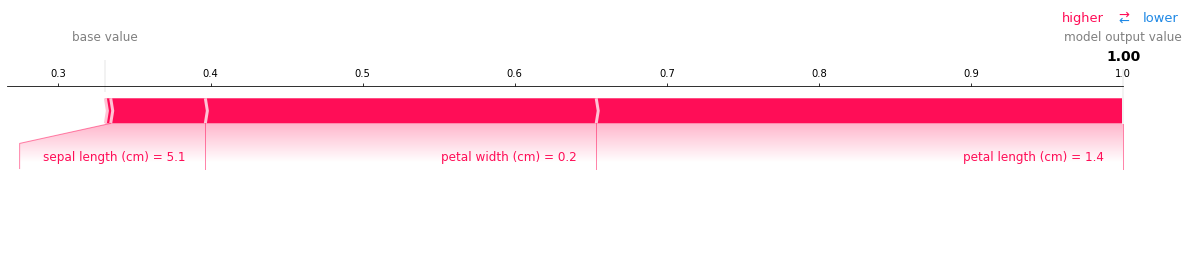

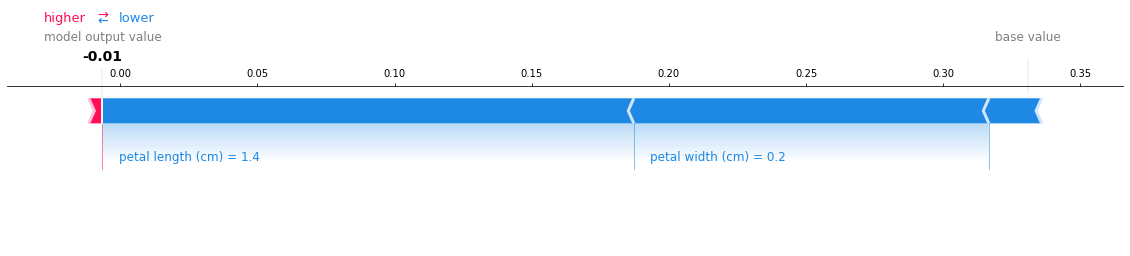

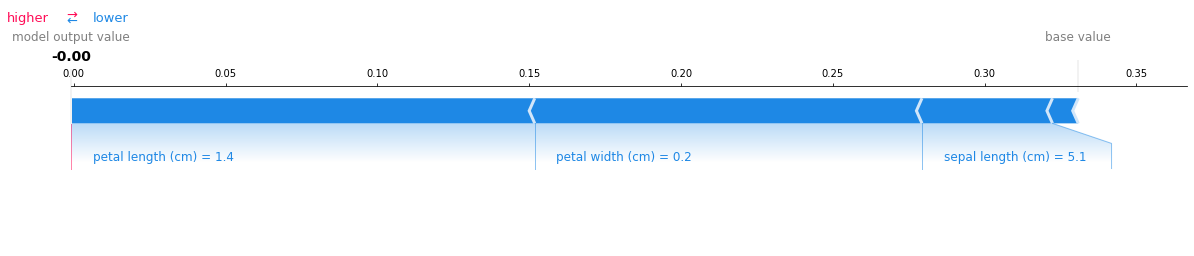

In [18]:
# force_plot
for i in range(3):  
    shap.force_plot(explainer.expected_value[0], shap_values_force[i], pred_data, matplotlib=True)

## dependence_plot

`dependence_plot`では、対象のクラスに対して各特徴量の値とSHAP値の関係を可視化する。

たとえば、irisのクラス「

In [14]:
shap_values_dep = explainer.shap_values(iris_df)

for col in iris_df.columns.tolist():
    shap.dependence_plot(col, shap_values_dep[0], features=iris_df)

SHAPError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.000000, while the model output was -26867912924566977102243687026811000663399523138821628375503349425266884300197146511803423469680889150202706708264131544195098731287262364215647145478324224.000000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [15]:
len(shap_values_dep)

NameError: name 'shap_values_dep' is not defined